# Additional analysis on functional coupling models fit to AC recordings

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import ECOG
from uoineuro.utils import plot_metric_summary
from uoineuro.coupling_utils import check_metrics

%matplotlib inline

In [2]:
# insert path to data and grid here
data_path = os.path.join(os.environ['HOME'], 'data/ecog/r32_b7.mat')
grid_path = os.path.join(os.environ['HOME'], 'data/ecog/grdid.mat')

In [3]:
ecog = ECOG(data_path=data_path, grid_path=grid_path)

In [4]:
coupling_fits_path = os.path.join(
    os.environ['HOME'], 'fits/uoineuro/coupling/ecog/ecog_coupling.h5'
)

tuning_fits_path = os.path.join(
    os.environ['HOME'], 'fits/uoineuro/tuning/ecog/ecog_tuning.h5'
)

In [5]:
coupling_fits = h5py.File(coupling_fits_path, 'r')
tuning_fits = h5py.File(tuning_fits_path, 'r')

In [6]:
baseline = coupling_fits['lasso']
algorithms = [coupling_fits['uoi_lasso_r2'],
              coupling_fits['uoi_lasso_aic'],
              coupling_fits['uoi_lasso_bic']]

In [7]:
dead_electrodes = [0, 19, 21]

## Metric Comparison

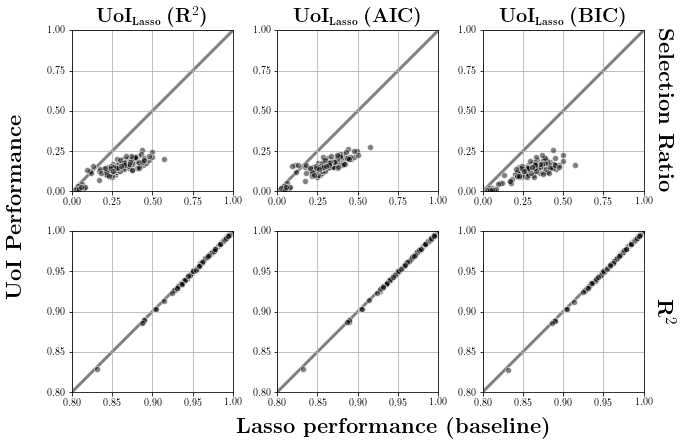

In [8]:
fig, axes = plot_metric_summary(baseline_group=baseline,
                                fits_groups=algorithms,
                                metrics=['selection_ratio', 'r2s_test'],
                                omit_idxs=dead_electrodes)

# additional customizations 

# first row: selection ratio
for idx in range(3):
    ax = axes[0, idx]
    ax.set_xlim([0, 1])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.grid('on')

# second row: r2
for idx in range(3):
    ax = axes[1, idx]
    ax.set_xlim([0.80, 1])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.set_xticks([0.8, 0.85, 0.9, 0.95, 1])
    ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1])
    ax.grid('on')
    
for ax in axes.ravel():
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)
    
# metric labels
axes[0, -1].set_ylabel(
    r'\textbf{Selection Ratio}',
    fontsize=22,
    labelpad=30,
    rotation=270)
axes[1, -1].set_ylabel(
    r'$\mathbf{R}^2$',
    fontsize=22,
    labelpad=30,
    rotation=270)
axes[0, -1].yaxis.set_label_position('right')
axes[1, -1].yaxis.set_label_position('right')

# uoi approach labels
axes[0, 0].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Lasso}}$ \textbf{(}$\mathbf{R}^2$\textbf{)}',
                     fontsize=20)
axes[0, 1].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Lasso}}$ \textbf{(AIC)}',
                     fontsize=20)
axes[0, 2].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Lasso}}$ \textbf{(BIC)}',
                     fontsize=20)

fig.text(
    x=0.55, y=-0.01,
    s=r'\textbf{Lasso performance (baseline)}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.03, y=0.5,
    s=r'\textbf{UoI Performance}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
plt.show()